# Box Office

In [67]:
import pandas as pd
data = pd.read_csv('2017_movie_dataframe.csv')

In [68]:
data.head()

,Unnamed: 0,Name,Year,Critic Rating,Critic Numbers,User Rating,User Numbers,Box office (USD),Runtime (minutes),Genre,Studio
0,0,Lady Bird (2017),2017,0.99,343,0.79,20509,48285330,93,"Comedy, Drama",A24
1,1,Get Out (2017),2017,0.99,335,0.86,72103,175428355,104,"Comedy, Horror, Mystery & Suspense",Universal Pictures
2,2,Wonder Woman (2017),2017,0.93,409,0.88,125470,412400625,141,"Action & Adventure, Drama, Science Fiction & F...",Warner Bros. Pictures
3,3,Coco (2017),2017,0.97,306,0.94,25717,208487719,-,"Action & Adventure, Animation, Comedy",Disney/Pixar
4,4,Dunkirk (2017),2017,0.92,406,0.81,66567,188042171,107,"Action & Adventure, Drama",Warner Bros. Pictures


In [70]:
data = data[data['Box office (USD)'] != '-']
data['Box office (USD)'] = data['Box office (USD)'].apply(pd.to_numeric)

In [73]:
data_corr = data[['Critic Rating','Critic Numbers','User Rating','User Numbers','Box office (USD)']].corr()

f:\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Box office')

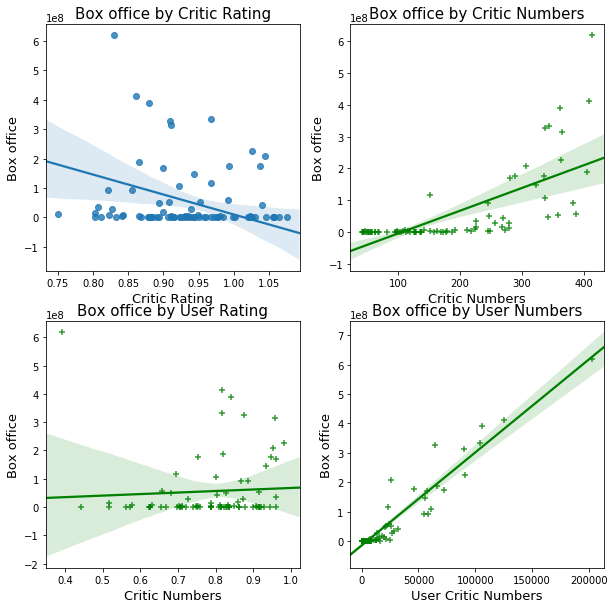

In [72]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
revenue = data[['Critic Rating', 'Critic Numbers', 'User Rating', 'User Numbers', 'Box office (USD)']]
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1 = sns.regplot(x='Critic Rating', y='Box office (USD)', data=revenue, x_jitter=.1)
plt.title('Box office by Critic Rating',fontsize=15)
plt.xlabel('Critic Rating',fontsize=13)
plt.ylabel('Box office',fontsize=13)

ax2 = plt.subplot(2,2,2)
ax2 = sns.regplot(x='Critic Numbers', y='Box office (USD)', data=revenue, x_jitter=.1,color='g',marker='+')
#ax2.text(6800,1.1e9,'r=0.78',fontsize=15)
plt.title('Box office by Critic Numbers',fontsize=15)
plt.xlabel('Critic Numbers',fontsize=13)
plt.ylabel('Box office',fontsize=13)

ax2 = plt.subplot(2,2,3)
ax2 = sns.regplot(x='User Rating', y='Box office (USD)', data=revenue, x_jitter=.1,color='g',marker='+')
#ax2.text(6800,1.1e9,'r=0.78',fontsize=15)
plt.title('Box office by User Rating',fontsize=15)
plt.xlabel('Critic Numbers',fontsize=13)
plt.ylabel('Box office',fontsize=13)

ax2 = plt.subplot(2,2,4)
ax2 = sns.regplot(x='User Numbers', y='Box office (USD)', data=revenue, x_jitter=.1,color='g',marker='+')
#ax2.text(6800,1.1e9,'r=0.78',fontsize=15)
plt.title('Box office by User Numbers',fontsize=15)
plt.xlabel('User Critic Numbers',fontsize=13)
plt.ylabel('Box office',fontsize=13)

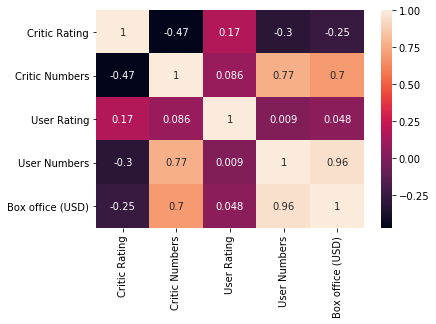

In [77]:
sns.heatmap(data_corr,annot=True) 

# Number of Movie Genre

In [147]:
import pandas as pd
data = pd.read_csv('2017_movie_dataframe.csv')
data.head()

,Unnamed: 0,Name,Year,Critic Rating,Critic Numbers,User Rating,User Numbers,Box office (USD),Runtime (minutes),Genre,Studio
0,0,Lady Bird (2017),2017,0.99,343,0.79,20509,48285330,93,"Comedy, Drama",A24
1,1,Get Out (2017),2017,0.99,335,0.86,72103,175428355,104,"Comedy, Horror, Mystery & Suspense",Universal Pictures
2,2,Wonder Woman (2017),2017,0.93,409,0.88,125470,412400625,141,"Action & Adventure, Drama, Science Fiction & F...",Warner Bros. Pictures
3,3,Coco (2017),2017,0.97,306,0.94,25717,208487719,-,"Action & Adventure, Animation, Comedy",Disney/Pixar
4,4,Dunkirk (2017),2017,0.92,406,0.81,66567,188042171,107,"Action & Adventure, Drama",Warner Bros. Pictures


In [148]:
# create all genre set
import re
movie_genre = data['Genre']
genre = set()   
genre_set = set()
for item in movie_genre:
    genre.update(item.strip().split(','))
for item in genre:
    genre_set.add(item.strip())
genre_set

{'Action & Adventure',
 'Animation',
 'Art House & International',
 'Comedy',
 'Documentary',
 'Drama',
 'Horror',
 'Kids & Family',
 'Mystery & Suspense',
 'Romance',
 'Science Fiction & Fantasy',
 'Sports & Fitness'}

Text(0,0.5,'count')

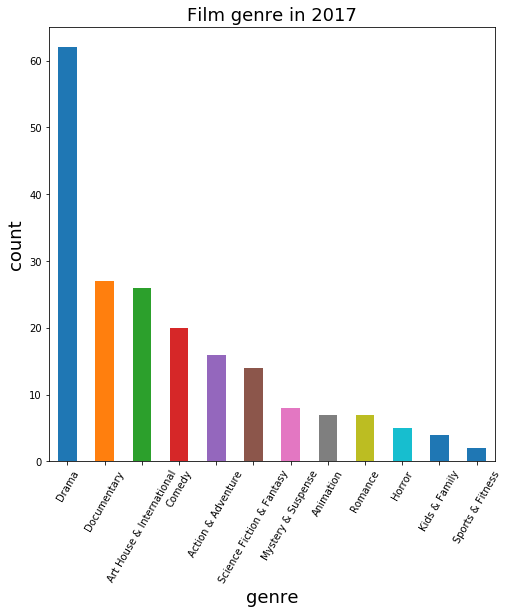

In [150]:
genre_df = pd.DataFrame()
for genre in genre_set:
    genre_df[genre] = data['Genre'].str.contains(genre).map(lambda x: 1 if x else 0)
genre_sum = genre_df.sum().sort_values(ascending = False)
fig = plt.figure(figsize = (8,8))
ax = plt.subplot(1,1,1)
ax = genre_sum.plot.bar()
plt.xticks(rotation=60)
plt.title('Film genre in 2017',fontsize = 18)
plt.xlabel('genre', fontsize = 18)
plt.ylabel('count', fontsize =18)

# Revenue of Movie Genre

In [162]:
profit_by_genre = pd.Series(index = genre_set)
genre_df['Box_office'] = data['Box office (USD)']
genre_df = genre_df[genre_df['Box_office'] != '-']
genre_df['Box_office'] = genre_df['Box_office'].apply(pd.to_numeric)
for genre in genre_set:
    profit_by_genre.loc[genre] = genre_df[genre_df[genre] == 1]['Box_office'].sum()

Art House & International    1.338786e+07
Sports & Fitness             1.255291e+07
Mystery & Suspense           6.041279e+08
Drama                        3.515090e+09
Comedy                       1.263167e+09
Documentary                  1.557993e+07
Science Fiction & Fantasy    2.596563e+09
Kids & Family                1.799252e+08
Horror                       5.168203e+08
Romance                      1.146303e+08
Action & Adventure           3.366994e+09
Animation                    3.902788e+08
dtype: float64

In [ ]:
dhdjfiebcvhdgds